# SYDE 552 Assignment 2: Vision
### Due Monday, February 19, 11:59pm
### Value: 15% of total marks for the course

This assignment covers the mammilian vision system, including both questions about the biology itself and constructing computational models based on Regression and Convolutional Neural Networks.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. The Vision System

The purpose of this part of the assignment is to test your knowledge of the brain’s visual system and the relationship between neurobiological features and computational properties. The best answers will discuss both function and anatomy, and will draw on specific anatomical examples to support theoretical claims. You are encouraged to discuss answers with your classmates, consult the slides notes, or use external resources -- but your answers must be your own! In particular, read the Kandel et al. chapters listed on the slides. Expect to write around 5 sentences for each 1 point.

**1.a) [2 marks]** The neurons in different parts of the brain are sensitive to different things, and can be thought of as different feature detectors.  For each of the types of neurons listed below, describe what feature they detect, their receptive fields, and how their connectivity to other neurons and/or their internal neural processes helps them to do this feature detection:
- Cones:
Cones are a type of cell in the retina that are sensitive to specific wavelengths of light. Each cone has a different receptive field tuned to be sensitive to specific wavelengths of light (Kandel et al).  Being attuned to different frequencies is what helps in being able to see and differentiate colours; a specific cone will be responsible for detecting a specific colour in the region it is located in (Kandel et al). Being connected to other cones specifically (and their overlap of wavelength sensitivities) are what enable us to see a spectrum of colours rather than singular static colours (Kandel et al).

- Sustained Ganglion Cells:
Sustained ganglion cells are optical cells that fire continuously for the duration of a stimulus, indicating that there indeed is stimulus, and it is continuing for this period of time.  Their receptive fields are the light intensity in a particular area of the retina (Kandel et al). Sustained ganglion cells together are able to detect certain patterns such as angled "bars", where being connected to adjacent ganglion cells and detecting action potential across a certain set of them will indicate that a "bar" or particular pattern that a receptior is sensitive to is present (Kandel et al.)

- Transient Ganglion Cells:
Transient ganglion cells spike periodically, detecting a change in the "on" or "off" status of the stimulus. Similarly to the sustained ganglion cell, the transient ganglion cell has a receptive field of the light intensity in a certain region. Transient ganglion cells' ability to aid in the detection of time based changes in our vision rea aided by certain cells such as "horizontal" and "amacrine" cells  which aid in sensitivity (Kandel et al.).

- Simple Cells: Simple cells detect whether a stimulus is "on" or "off", with specific cells detecting either "on" or "off" split into respective regions. The receptive field of a simple cell is simply the "on" or "off" state of a stimulus (Kandel et al.). Being split into regions aids simple cells with detecting the movement of objects as they move from the "on" field to the "off" field of the vision for example (Kandel et al.).

**1. b) [1 marks]** Describe two instances where retinotopic organization facilitates visual processing.  For each example, be sure to mention its anatomical location and discuss how retinitopy contributes to the feature detection.

Retinotopic organization is where the organization of certain cells with similar functions enables to processing of certain features.
For example, Kandel et al. there are certain "columns" of retinal cells that end up "preferring" particular eye inputs (either left or right).
The exact retinal cells are "located in either the epsilateral or contralateral retina" (Kandel et al.) which continues down to the nucleus of the brain. This organization is important for information to the correct layer of the visual cortex (Kandel et al.).
Another example of retinotopic organization relating to visual processing is the columns of cells relating to orientation of a "bar" stimulus. These cells can be located in the striate cortex (Adams, Horton. https://link.springer.com/referenceworkentry/10.1007/978-3-540-29678-2_5695)
As a guess, the organization of the cell columns (the visual of which can be seen in Kandel et al. Figure 25-11) is important for processing how the orientation of a stimulus is changing overtime, as cells that are sensitive to similarly oriented bars are often closer together, ending up in a sort of swirl of gradients of orientation.

**1. c) [2 marks]** Discuss the similarities and differences between convolutional neural networks and the visual system.

A parallel can be drawn from convolutional neural networks to the visual system partially in the fact that both have many complex layers. From what was discussed in class, convolutional neural networks consist of an input layer with many different weights detecting certain patterns. Then in further layers, weights and information are shared from previous layers to 
 process further and continue to send down further layers for continued processing. Similarly, the visual system operates in a similar manner, with initial neurons detecting simple patterns/features such as on or off, then as these features are combined in further layers, more abstract features can be extracted.

There are still some differences however. The complexity, size, and efficiency of our visual system are unmatched by any CNN for reasons we continue to strive to learn. Additionally, when it comes to identifying new objects the visual system paired with the rest of the central nervous system can abstract information and make informed guesses for identification whereas a manmade neural network (while trained on tons of data) may be unable to identify a new object if it was not trained on it. 

# 2. Classifying Stimuli Using Regression

The retina transforms the light entering an eye into a particular set of features, which are then sent to the rest of the brain for further processing.  In this section we look at how neurons might detect patterns, and how that detection changes with different feature detectors.

The data we will use for this is the classic MNIST dataset 

In [12]:
import torchvision
mnist = torchvision.datasets.MNIST(root='.', download=True)

The MNIST digits are 28x28 pixels each, each pixel is a value from 0 to 255, and there are 60,000 of them.  The raw data is in `mnist.data` and the target value (i.e. the actual digit) is in `mnist.targets`.  Here are the first 24 of each:

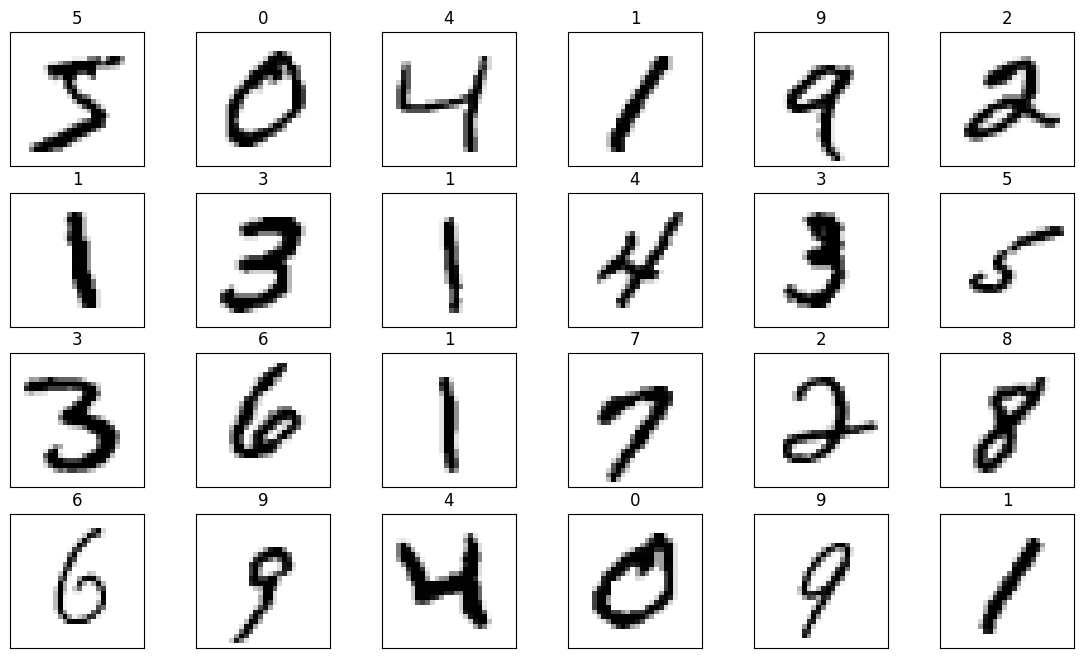

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

**2.a) [1 mark]** We can imagine the MNIST digits as 784 (28 times 28) input neurons.  We want to connect these 784 neurons to 10 output neurons, one for each digit, and see how accurately we can classify the digits.  

To find the weights in this question, we will use Ridge Regression.  `X` is the MNIST input data, divided by 255 to rescale it to between 0 and 1, and then reshaped to be a 60000x784 matrix

```
X = mnist.data.reshape((60000,28*28)).float()/255
```

The target data T is a "one-hot" representation of our outputs.  That is, instead of the desired output to be `5`, the output should be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]` and if the desired output should be `0`, that would be `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`.  

```
T = torch.nn.functional.one_hot(mnist.targets).float()
```

If our output is `Y=X @ W`, we need to find `W` such that `Y` is as close as possible to `T`.  For Ridge Regression, this is computed as

```
W = torch.inverse(X.T @ X + lambd*I) @ (X.T @ T)
```

where `I` is an identity matrix of the correct size (`torch.eye(784).float()`) and `lambd` is the $\lambda$ parameter that stops the regression from overfitting.

When building any sort of classifier model, we generally want to create the model using one set of data, and then test it on another set of data.  Here, we will use the first 5,000 data points for creating ("training") the model, and the other 55,000 for testing:

```
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
```

Given this data, you should find `W` using *only* the `X_train` and `T_train` data.  Once you find `W` you can apply it to the `X_train` and `X_test` to get `Y_train` and `Y_test`

```
Y_train = X_train @ W
Y_test = X_test @ W
```

Finally, you can compute the accuracy by determining when the output is the correct category.  Here we will do this by counting when the largest output value in each row in `Y` is at the same spot as the largest output value in each row in `T`:

```
accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)
```

- Compute the training and testing accuracy when $\lambda=1$ and we use the first 5,000 data points as for training (and test on the remaining 55,000).  Report both numbers.  
- Do we expect the testing accuracy to be larger or smaller than the training accuracy?  Why?


In [14]:
import torch
from torch.nn.functional import one_hot

lambd = 1.0
I = torch.eye(784).float()

X = mnist.data.reshape((60000,28*28)).float()/255
T = one_hot(mnist.targets).float()
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

W = torch.inverse(X_train.T @ X_train + lambd*I) @ (X_train.T @ T_train)

Y_train = X_train @ W
Y_test = X_test @ W


accuracy_train = torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train)
accuracy_test = torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test)

print(accuracy_train.item())
print(accuracy_test.item())

0.9034000039100647
0.8191817998886108


I would expect the training data to have higher accuracy since the model becomes too familiar with this data set (potentially overfitted to the training set). Once it is presented with a new set, it doesn't match the training data exactly which leads it to making some errors.

**2. b) [2 marks]**  Repeat part a) but vary the value of `lambd` from $10^{-5}$ to $10^5$.   You can use a `for` loop such as `for lambd in np.logspace(-5, 5, 11):`.  

- Generate a single plot that shows the training and testing accuracy.  Make sure to label your axes and the lines on the plot.  

- What is the best value for `lambd` (i.e. the value for which we get the best training accuracy).  
- Why does changing `lambd` affect the accuracy?  
- Why would having a large `lambd` value be good for making a biologically realistic model?

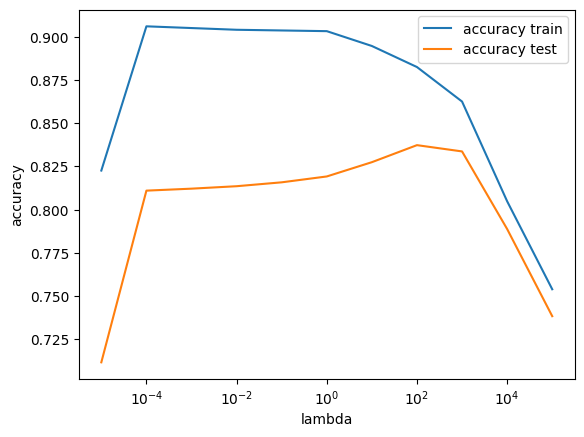

0.0001


In [10]:
import numpy as np
import pandas as pds

accuracy_train = []
accuracy_test = []
X = mnist.data.reshape((60000,28*28)).float()/255
T = torch.nn.functional.one_hot(mnist.targets).float()
lambd = np.logspace(-5, 5, 11)
N = 5000
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing

for l in lambd:
    I = torch.eye(784).float()
    W = torch.inverse(X_train.T @ X_train + l*I) @ (X_train.T @ T_train)
    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    accuracy_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))


fig, ax = plt.subplots()
ax.semilogx(lambd, accuracy_train, label="accuracy train")
ax.semilogx(lambd, accuracy_test, label="accuracy test")

ax.set(xlabel='lambda', ylabel='accuracy')
plt.legend()
plt.show()

#lambda that results in the best training accuracy:
print(lambd[pds.Series(accuracy_train).idxmax()])

From the results, a lambda value of 0.0001 results in the highest accuracy.

Since lambda stops the model from overfitting, it changes the accuracy by stopping the model from getting "too comfortable" with the training data. Accuracy can decrease when the model is not stopped from overfitting since it filters out valid data as "noise".

For a biologically realistic model, a higher lambda may be more accurate since our nervous systems are able to add in many more layers of extraction and critical thought. By having a high lambda, we would be "overfitting" ourselves by becoming extremly familiar with certain stimuli (e.g. we know exactly what an apple is, even if it's a different colour or shape) which is how our brains work in real life, this reduces the amount of guesswork we need to do to identify features. Additionally, our higher reasoning skills allow us to make smarter inferences based on a massive amount of  historical data that an overfitted model does not have access to.

**2. c) [1 mark]** The input we have used so far is not very realistic.  In real life, when we see written digits, they are under a wide range of lighting conditions. For this question, we change `X` by scaling it randomly and adding a random background brightness.

```
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000)[:,None]) + torch.rand(60000)[:,None]
```

To see what this looks like, here is how you can plot it:

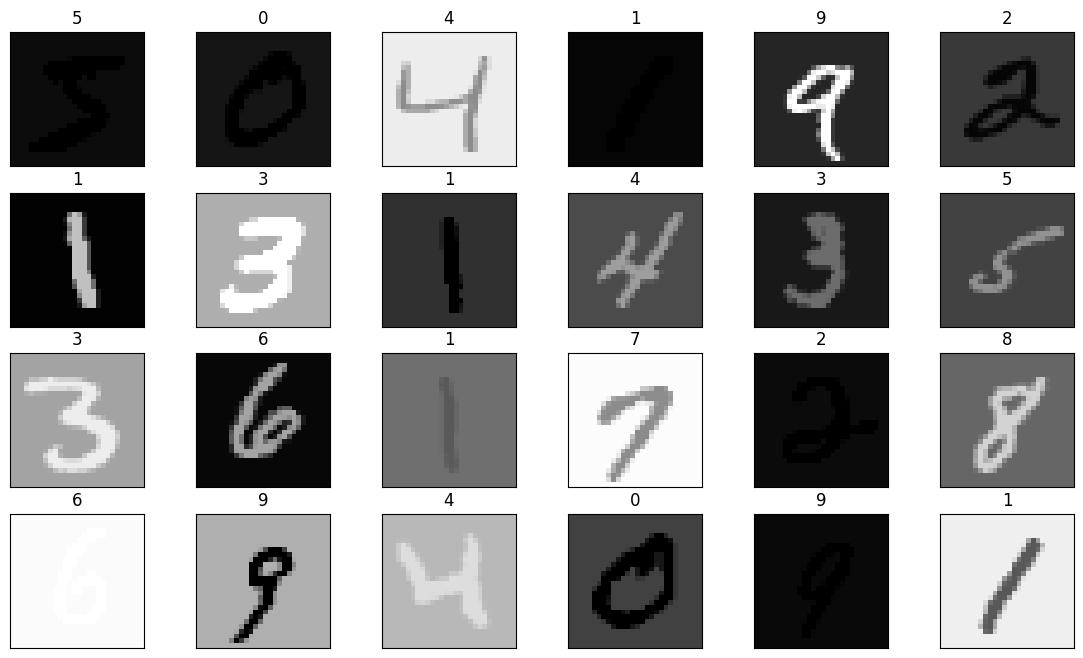

In [15]:
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]

plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(X[i].reshape(28,28), vmin=0, vmax=1, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))


- Generate the same plot as in 2b) but for this new dataset.  
- Is this a harder or easier task than with the original dataset?
- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
- Is the original dataset more like the data at the retina or like the data in the ganglion cells?

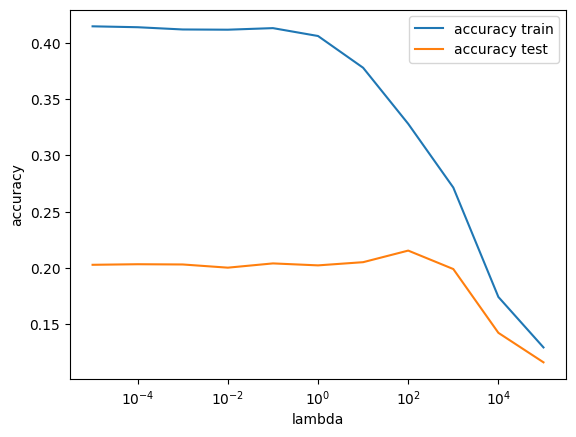

1e-05


In [16]:
T = one_hot(mnist.targets).float()

N = 5000
X_train, X_test = X[:N], X[N:]
T_train, T_test = T[:N], T[N:]

lambd = np.logspace(-5, 5, 11)

accuracy_train = []
accuracy_test = []

for l in lambd:
    W = torch.pinverse(X_train.T @ X_train + l*I) @ (X_train.T @ T_train)

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    accuracy_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))


fig, ax = plt.subplots()
ax.semilogx(lambd, accuracy_train, label="accuracy train")
ax.semilogx(lambd, accuracy_test, label="accuracy test")
ax.set(xlabel='lambda', ylabel='accuracy')
plt.legend()
plt.show()

#lambda that results in the best training accuracy:
print(lambd[pds.Series(accuracy_train).idxmax()])

- Is this a harder or easier task than with the original dataset?
This much more difficult that with the original set. We can tell this due to the fact the accuracies are much lower for this data set than the previous, meaning the model struggles to differentiate and identify the data correctly.

- Is this new dataset more like the data at the retina or like the data in the ganglion cells?
The new dataset is more like the data in the retina. The visual inputs to the retina are rarely homogenous and vary widely. The information from the retina must be sent to further layers/neurons for processing and normalization into more familiar data.

- Is the original dataset more like the data at the retina or like the data in the ganglion cells?
The original data set is more like the data in the ganglion cells. After receiving the input information from the retina, the data is processed a bit to identify certain features slightly easier in the ganglion cells.

**2. d) [1 mark]** We can think of neurons in the visual system as transforming the data in various ways.  Given the dataset in 2c), neurons might be able to transform it to look more like the origin data.

Here are three data transformations that could be applied here:

Subtracting the Mean
```
X = X-torch.mean(X, axis=1)[:,None]
```

Absolute value
```
X = torch.abs(X)
```

Normalizing
```
X = X/torch.linalg.norm(X, axis=1)[:,None]
```

- Apply all three of them (in the order shown above) to the dataset and generate the same graph as in 2b) and 2c).
- How does the performance of the network compare to that of 2b) and 2c)?
- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?
- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?

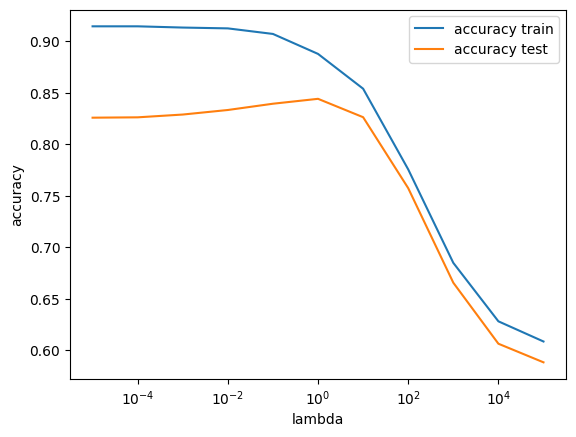

1e-05


In [17]:
import numpy as np
import pandas as pds

accuracy_train = []
accuracy_test = []
X = mnist.data.reshape((60000,28*28)).float()/255
X = X*(1-2*torch.rand(60000))[:,None] + torch.rand(60000)[:,None]
X = X-torch.mean(X, axis=1)[:,None]
X = torch.abs(X)
X = X/torch.linalg.norm(X, axis=1)[:,None]

T = torch.nn.functional.one_hot(mnist.targets).float()
X_train, X_test = X[:N], X[N:]  # split X into two parts for training and testing
T_train, T_test = T[:N], T[N:]  # split T into two parts for training and testing
N = 5000

lambd = np.logspace(-5, 5, 11)
I = torch.eye(784).float()

for l in lambd:
    W = torch.pinverse(X_train.T @ X_train + l*I) @ (X_train.T @ T_train)

    Y_train = X_train @ W
    Y_test = X_test @ W

    accuracy_train.append(torch.sum(torch.argmax(Y_train, axis=1)==torch.argmax(T_train, axis=1))/len(Y_train))
    accuracy_test.append(torch.sum(torch.argmax(Y_test, axis=1)==torch.argmax(T_test, axis=1))/len(Y_test))


fig, ax = plt.subplots()
ax.semilogx(lambd, accuracy_train, label="accuracy train")
ax.semilogx(lambd, accuracy_test, label="accuracy test")

ax.set(xlabel='lambda', ylabel='accuracy')
plt.legend()
plt.show()

#lambda that results in the best training accuracy:
print(lambd[pds.Series(accuracy_train).idxmax()])

- How does the performance of the network compare to that of 2b) and 2c)?


When the lambda value is set lower, this network outperforms 2b and 2c easily. However when the lambda value is greater, 2b begins to outperform the data but not 2c.

- Do any of the three transformations above correspond to processing that occurs in the eye before the signal is sent to the rest of the brain?


There's probably some level of normalization that occurs in the eye prior to being sent to the brain. For example when the eye is in either a very dark or light situation, we are still able to discern whether things are "lighter" compared to the surroundings likely thanks to normalization. If our vision was not normalized, a certain luminance may always appear "dark" regardless of the luminance of the rest of the setting.

- Given this result, why does the eye transform the data between raw rods & cones and the ganglion cells?


Following the luminance example, this processing that happens prior to the ganglion cells may actually help the ganglion cells from being overly sensitive to slight variations (Kandel et al.). Being overly sensitive may exhaust the eyes and neurons faster.

# 3. Classifying Stimuli Using Backpropogation

Regression is restricted to learning the layer of weights that produces the final output.  If we want to also learn what features are most useful for producing that output, we need a more complex learning rule, and this is typically backpropogation.  Here we will classify the same data as in question 2, and we will build up different network structures to do so.

Backpropogation tends to work best when learning on a bunch of data at the same time (a "batch").  The following code will set up the same training and testing data as in question 2, but presented in randomized batches of 1000 at a time.

```python
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)
```

To create a neural network, we need to define what the weights are we will learn and we need to define the computation that the network will perform.  Here is the definition of a simple network that has an input of 784 values (the MNIST inputs), which go to 50 "hidden"-layer neurons, and then to the output 10 neurons.  So the network will learn to transform the 784 inputs into 50 new representations, and from those 50 features it will learn weights to create an output of 10 values (our 10 categories).  This is known as a multi-layer perceptron, or a standard neural network with a single hidden layer.

```python
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
```

Finally, we need to train our model.  When training, it is useful to keep track of how well the model is doing on the testing data.  Since testing the network takes time, we don't necessarily want to do it all the time.  Instead, the following code trains the network 10 times, and then records how well the network does on the training data and on the testing data.

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  


mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


Given the above code, you can train your network 10 times by doing

```python
for i in range(10):
    continue_training()
```

If you want to continue training even more, you can just run that `for` loop again.

To plot the final accuracy results, you can use

```python
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()
```

**3. a) [1 mark]** Run the model above for 10 iterations (i.e. call `continue_training` 10 times).

- Plot the training and testing accuracy.  
- Is this model better or worse than the best models developed in question 2?

C:\Users\Abby\AppData\Local\Temp\ipykernel_23332\2689451223.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8614000082015991
Iteration 1 Testing accuracy: 0.8632000088691711
Iteration 2 Training accuracy: 0.900600016117096
Iteration 2 Testing accuracy: 0.8863999843597412
Iteration 3 Training accuracy: 0.9150000214576721
Iteration 3 Testing accuracy: 0.8944000005722046
Iteration 4 Training accuracy: 0.9247999787330627
Iteration 4 Testing accuracy: 0.8992000222206116
Iteration 5 Training accuracy: 0.9287999868392944
Iteration 5 Testing accuracy: 0.9028000235557556
Iteration 6 Training accuracy: 0.9376000165939331
Iteration 6 Testing accuracy: 0.9031999707221985
Iteration 7 Training accuracy: 0.9405999779701233
Iteration 7 Testing accuracy: 0.9064000248908997
Iteration 8 Training accuracy: 0.9437999725341797
Iteration 8 Testing accuracy: 0.9093999862670898
Iteration 9 Training accuracy: 0.9476000070571899
Iteration 9 Testing accuracy: 0.9093999862670898
Iteration 10 Training accuracy: 0.9495999813079834
Iteration 10 Testing accuracy: 0.9089999794960022


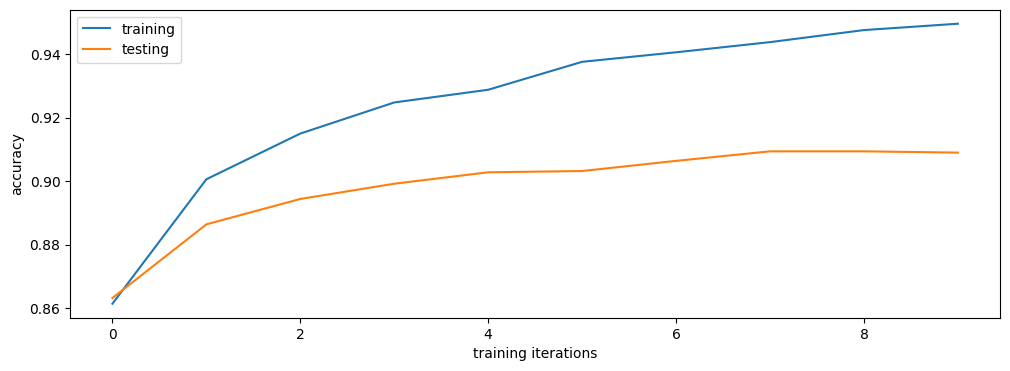

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
network = Net()
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

- Is this model better or worse than the best models developed in question 2?

The model tends to perform better than the models in question 2. Of coures depending on the number of training iterations, the performance may be either better or worse than the models in question 2. Obviously as the model is trained an increasing number of times, the accuracy continues to rise and outperform.

**3. b) [1 mark]** Repeat question 3a five times.  This does not mean to run a single model for 50 iterations.  Rather, you need to reset the model and train it again.  The easiest way to do this is to recreate the network and the optimizer like this:

```python
network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
```

- Make a plot showing the 5 different training accuracies and 5 different testing accuracies
- Also show the average training and testing accuracy on the plot.
- Each of the 5 models should show slightly different accuracies.  Why is this the case?


C:\Users\Abby\AppData\Local\Temp\ipykernel_23332\835395512.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.8569999933242798
Iteration 1 Testing accuracy: 0.8529999852180481
Iteration 2 Training accuracy: 0.9047999978065491
Iteration 2 Testing accuracy: 0.8871999979019165
Iteration 3 Training accuracy: 0.9196000099182129
Iteration 3 Testing accuracy: 0.899399995803833
Iteration 4 Training accuracy: 0.9277999997138977
Iteration 4 Testing accuracy: 0.9034000039100647
Iteration 5 Training accuracy: 0.9340000152587891
Iteration 5 Testing accuracy: 0.9057999849319458
Iteration 6 Training accuracy: 0.9391999840736389
Iteration 6 Testing accuracy: 0.907800018787384
Iteration 7 Training accuracy: 0.9441999793052673
Iteration 7 Testing accuracy: 0.9115999937057495
Iteration 8 Training accuracy: 0.9491999745368958
Iteration 8 Testing accuracy: 0.9125999808311462
Iteration 9 Training accuracy: 0.9506000280380249
Iteration 9 Testing accuracy: 0.9139999747276306
Iteration 10 Training accuracy: 0.9552000164985657
Iteration 10 Testing accuracy: 0.9115999937057495
Iteration 

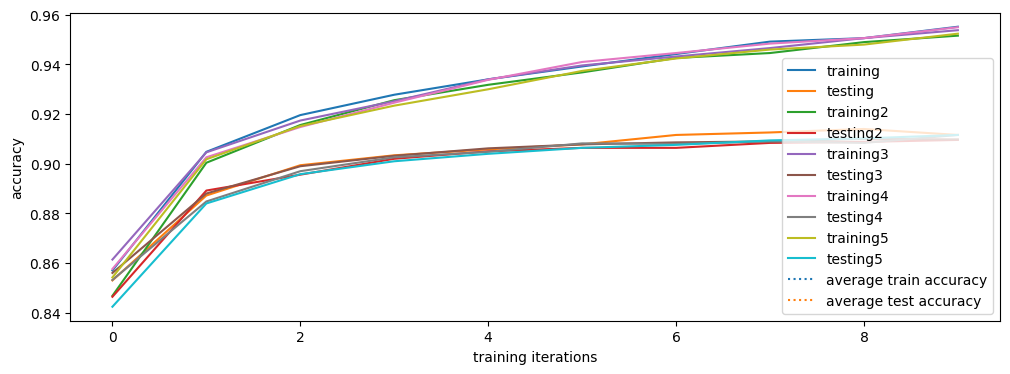

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, 50)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(50, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
accuracy_train2 = []
accuracy_test2 = []
accuracy_train3 = []
accuracy_test3 = []
accuracy_train4 = []
accuracy_test4 = []
accuracy_train5 = []
accuracy_test5 = []

network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)

def continue_training(accuracy_test, accuracy_train):
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(10):
    continue_training(accuracy_test, accuracy_train)

network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)

for j in range(10):
    continue_training(accuracy_test2, accuracy_train2)

network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
for k in range(10):
    continue_training(accuracy_test3, accuracy_train3)

network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
for l in range(10):
    continue_training(accuracy_test4, accuracy_train4)

network = Net()
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
for m in range(10):
    continue_training(accuracy_test5, accuracy_train5)


plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')

plt.plot(accuracy_train2, label='training2')
plt.plot(accuracy_test2, label='testing2')

plt.plot(accuracy_train3, label='training3')
plt.plot(accuracy_test3, label='testing3')

plt.plot(accuracy_train4, label='training4')
plt.plot(accuracy_test4, label='testing4')

plt.plot(accuracy_train5, label='training5')
plt.plot(accuracy_test5, label='testing5')

plt.plot(np.mean([accuracy_train, accuracy_train2, accuracy_train3, accuracy_train4, accuracy_train5]), ':', label='average train accuracy')
plt.plot(np.mean([accuracy_test, accuracy_test2, accuracy_test3, accuracy_test4, accuracy_test5]), ':', label='average test accuracy')

plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

- Each of the 5 models should show slightly different accuracies.  Why is this the case?

The accuracies are different each time since the model is reset after each time?


**3. c) [1 mark]** Repeat question 3b varying the number of neurons in the hidden layer of the network.  The current value is 50.  Try it with 5, 10, 20, 50, and 100 neurons.  For each number of neurons, repeat five times and take the average (like in question 3b).  

- Plot the final testing accuracy on the y-axis and the number of neurons on the x-axis.  Note that to speed things up you can remove the testing computation from continue_training until the very end, since we only need the final testing score.


C:\Users\Abby\AppData\Local\Temp\ipykernel_23332\2000021944.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category


Iteration 1 Training accuracy: 0.6972000002861023
Iteration 1 Testing accuracy: 0.6991999745368958
Iteration 2 Training accuracy: 0.800000011920929
Iteration 2 Testing accuracy: 0.7692000269889832
Iteration 3 Training accuracy: 0.8389999866485596
Iteration 3 Testing accuracy: 0.8026000261306763
Iteration 4 Training accuracy: 0.855400025844574
Iteration 4 Testing accuracy: 0.823199987411499
Iteration 5 Training accuracy: 0.8695999979972839
Iteration 5 Testing accuracy: 0.8331999778747559
Iteration 6 Training accuracy: 0.8805999755859375
Iteration 6 Testing accuracy: 0.8396000266075134
Iteration 7 Training accuracy: 0.8902000188827515
Iteration 7 Testing accuracy: 0.847599983215332
Iteration 8 Training accuracy: 0.895799994468689
Iteration 8 Testing accuracy: 0.8510000109672546
Iteration 9 Training accuracy: 0.8985999822616577
Iteration 9 Testing accuracy: 0.8532000184059143
Iteration 10 Training accuracy: 0.9034000039100647
Iteration 10 Testing accuracy: 0.8582000136375427
Iteration 1 T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iteration 50 Testing accuracy: 0.9118000268936157


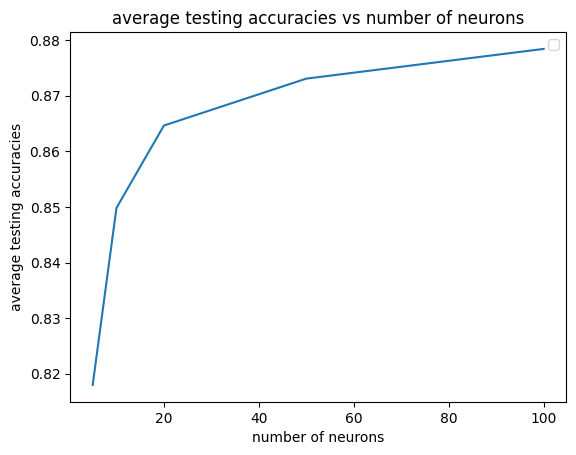

In [24]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  


class Net(nn.Module):
    def __init__(self, neuron):
        super(Net, self).__init__()
        # these will be learned
        self.fc1 = nn.Linear(784, neuron)   # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(neuron, 10)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = x.view(-1, 784)             # flatten the input from 28x28 to 784 values
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return F.log_softmax(x)         # apply a softmax function as we just want one large output indicating category
    
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []
accuracy_train2 = []
accuracy_test2 = []
accuracy_train3 = []
accuracy_test3 = []
accuracy_train4 = []
accuracy_test4 = []
accuracy_train5 = []
accuracy_test5 = []



def continue_training(accuracy_test, accuracy_train):
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)



neurons = [5, 10, 20, 50, 100]
avg_testing_accuracies = []

for neuron in neurons:
    network = Net(neuron)
    optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,
                      momentum=0.5)
    for i in range(10):
        continue_training(accuracy_test, accuracy_train)

    network = Net(neuron)
    optimizer = optim.SGD(network.parameters(), 
                        lr=0.1,
                        momentum=0.5)
    
    for j in range(10):
        continue_training(accuracy_test2, accuracy_train2)
    
    network = Net(neuron)
    optimizer = optim.SGD(network.parameters(), 
                        lr=0.1,
                        momentum=0.5)
    for k in range(10):
        continue_training(accuracy_test3, accuracy_train3)

    network = Net(neuron)
    optimizer = optim.SGD(network.parameters(), 
                        lr=0.1,
                        momentum=0.5)
    for l in range(10):
        continue_training(accuracy_test4, accuracy_train4)

    network = Net(neuron)
    optimizer = optim.SGD(network.parameters(), 
                        lr=0.1,
                        momentum=0.5)
    for m in range(10):
        continue_training(accuracy_test5, accuracy_train5)

    avg_testing_accuracies.append(np.mean([accuracy_test, accuracy_test2, accuracy_test3, accuracy_test4, accuracy_test5]))


plt.plot(neurons, avg_testing_accuracies)

plt.legend()
plt.xlabel('number of neurons')
plt.ylabel('average testing accuracies')
plt.title('average testing accuracies vs number of neurons')

plt.show()



**3. d) [2 marks]** Now we will add a convolution layer to our network.  The following network adds two convolution layers before two normal neural network layers.

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
```

The following code can be used to plot the learned features in the first layer:
```python
plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()
```

- Train the model through 40 iterations and generate a plot of training and testing accuracy over time.
- Does this perform better or worse than the previous models in this assignment?
- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?
- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

C:\Users\Abby\AppData\Local\Temp\ipykernel_23332\118666608.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.8216000199317932
Iteration 1 Testing accuracy: 0.8357999920845032
Iteration 2 Training accuracy: 0.9440000057220459
Iteration 2 Testing accuracy: 0.9218000173568726
Iteration 3 Training accuracy: 0.9624000191688538
Iteration 3 Testing accuracy: 0.9434000253677368
Iteration 4 Training accuracy: 0.9706000089645386
Iteration 4 Testing accuracy: 0.9477999806404114
Iteration 5 Training accuracy: 0.9829999804496765
Iteration 5 Testing accuracy: 0.9580000042915344
Iteration 6 Training accuracy: 0.9890000224113464
Iteration 6 Testing accuracy: 0.9617999792098999
Iteration 7 Training accuracy: 0.9905999898910522
Iteration 7 Testing accuracy: 0.9610000252723694
Iteration 8 Training accuracy: 0.9909999966621399
Iteration 8 Testing accuracy: 0.9628000259399414
Iteration 9 Training accuracy: 0.9954000115394592
Iteration 9 Testing accuracy: 0.9648000001907349
Iteration 10 Training accuracy: 0.998199999332428
Iteration 10 Testing accuracy: 0.9652000069618225
Iteration

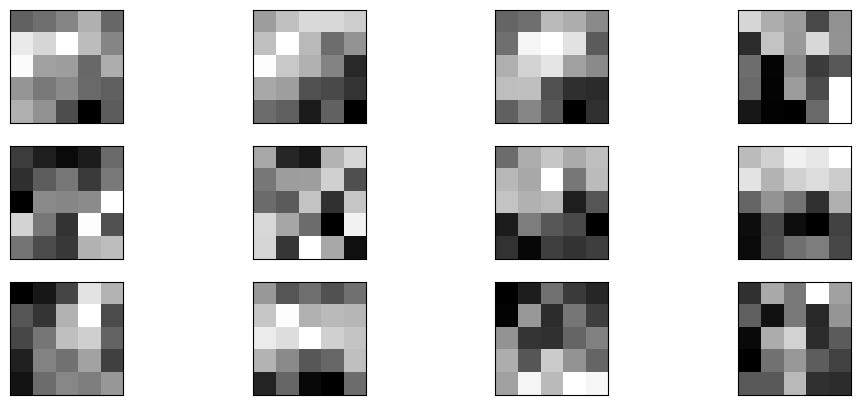

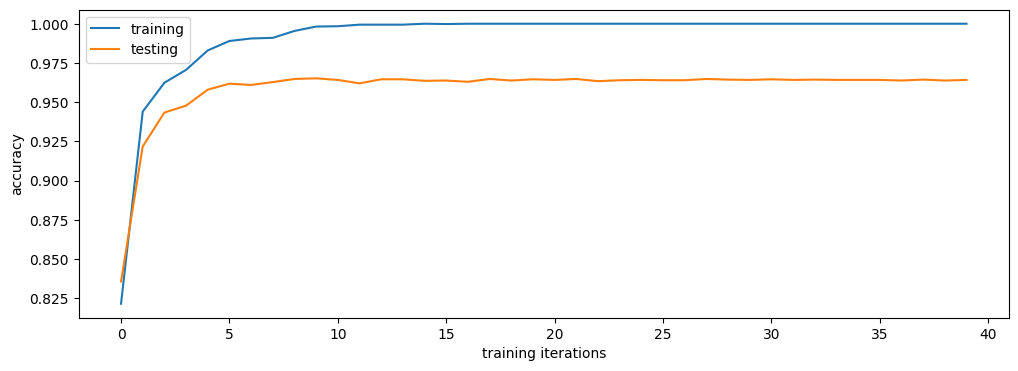

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim  


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
    
network = Net()
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                           batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                          batch_size=1000, shuffle=True)

# create the learning rule
optimizer = optim.SGD(network.parameters(), 
                      lr=0.1,   # learning rate
                      momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

for i in range(40):
    continue_training()

plt.figure(figsize=(12,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(network.conv1.weight[i][0].detach().numpy(), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

- Does this perform better or worse than the previous models in this assignment?
Compared to the models in question 2, this model outperforms easily, not requiring many iterations to quickly reach around 95% accuracy. Compared to the previous models in question 3, this model also seems to perform slightly better, able to reach 95% accuracy for the testing set in around 5 iterations, whereas the previous models were not able to reach 95% accuracy for the testing set within 10 iterations at all.


- What advantages and disadvantages do you see with this approach (in comparison to the previous parts of the assignment)?

One clear advantage is the greatly improved accuracy in less iterations compared to the previous models. Additionally, we do not need to worry about setting a parameter to overfit the training data compared to the models in question 2. 

However in comparison to most other models in the assignment, this one is quite a bit slower (taking my PC around 5 minutes to run compared to a few seconds or up to around 4 minutes). The massive set that required to be reset for 5 new models obviously took much longer (20 minutes).

- Plot the features learned by the first convolution layer.  How do they compare to real features detected in the V1 area of the brain?

As learned in class the V1 area of the brain is responsible for identifying edges and lines, Presumably, this first convolution layer is similarly identifying edges and lines from the fed data.

**BONUS [1 mark]** Try to improve the neural network.  You want to get the best testing accuracy you can.  Try at least two different approaches and report your results.